# Histogram based pole selection with intervals
Vojtech Kopecky, CTU in Prague, 2023

In [1]:
import sys

# Append path to sdypy-EMA project from https://github.com/sdypy/sdypy-EMA.git
sys.path.append('C:/Users/pc/PycharmProjects/sdypy-EMA/sdypy') # Change it to path on your computer

import tools as tl # Import of tools made in this project
tl.plt.rcParams['figure.dpi'] = 300
tl.plt.rcParams['savefig.dpi'] = 300
tl.plt.rcParams['figure.figsize'] = [10, 5]

path_to_data = ['C:/Users/pc/OneDrive - České vysoké učení technické v Praze/DATA_D/_GithubProjectData/'
                'EMA_with_sdypy/UFF_with_FRF_aluminum_casting/'] # Change it to path on your computer

## Selection of intervals
First, list of intervals is created. Programme will be looking for amount of peaks specified in last column in interval of frequency specified in first two columns. They do not have to be in increasing order and they may overlap each other, in that case, first mentioned interval has priority to choose most signifficant pole.

In [2]:
intervals = [[1200, 1450, 1],
             [1450, 2900, 1],
             [2900, 3400, 1],
             [3700, 4300, 1],
             [5200, 5700, 1],
             [6000, 6500, 2],
             [7000, 8000, 3],
             [8000, 10000, 6]
             ]

## EMA for FRF measurement
Function proc() defined lower creates object part of class **ModelEMA**, **ModelEMA.model** contains object class EMA from sdypy-EMA from https://github.com/sdypy/sdypy-EMA.git. It automatically computes stabilization diagram using LSCE. 

Method **get_stable_poles** selects stable poles from stability diagram. Method **poles_from_intervals** creates histogram of stable poles and in intervals defined in intervals finds histogram bins with maximal value. From poles in this bin, it creates another histogram over damping axis and finds most likely pole(s) for each segment of interval.

Method **reconstruct_avg** uses LSFD from sdypy-EMA to compute modal constants including modal vectors and plots comparation of measured and reconstructed FRF in mean of log of magnitude of FRF graph. 

If you wish to look closer onto comparation of reconstructed FRFs, use method **reconstruct_scroll()** which open window in which you can scroll through all FRFs. Example: **p11.reconstruct_scroll()**

In [3]:
def proc(path):
    part = tl.ModelEMA(path_to_data[0], path)

    part.get_stable_poles()

    part.poles_from_intervals(intervals)

    part.reconstruct_avg()
    
    return part

## Processing of all measurements
5 aluminum casted parts were measured 4 times each. Vibration was excited by mechatronic hammer, 49 poins on the part were measured using laser vibrometer in three directions (x, y, z), resulting in 147 FRFs. Measurements may be accessed at: https://campuscvut-my.sharepoint.com/:f:/g/personal/kopecvo2_cvut_cz/EjqIPAJkpa5JlowOmD8zgboBfYC-6OnxhVr42lZJKhHJcA?e=ONA1Tp. 

100%|█████████████████████████████████████████████████████████████| 150/150 [00:01<00:00, 80.51it/s]
C:\Users/pc/PycharmProjects/sdypy-EMA/sdypy\EMA\EMA.py:935: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  A_ = np.linalg.lstsq(P[mask], Y[mask])[0].T


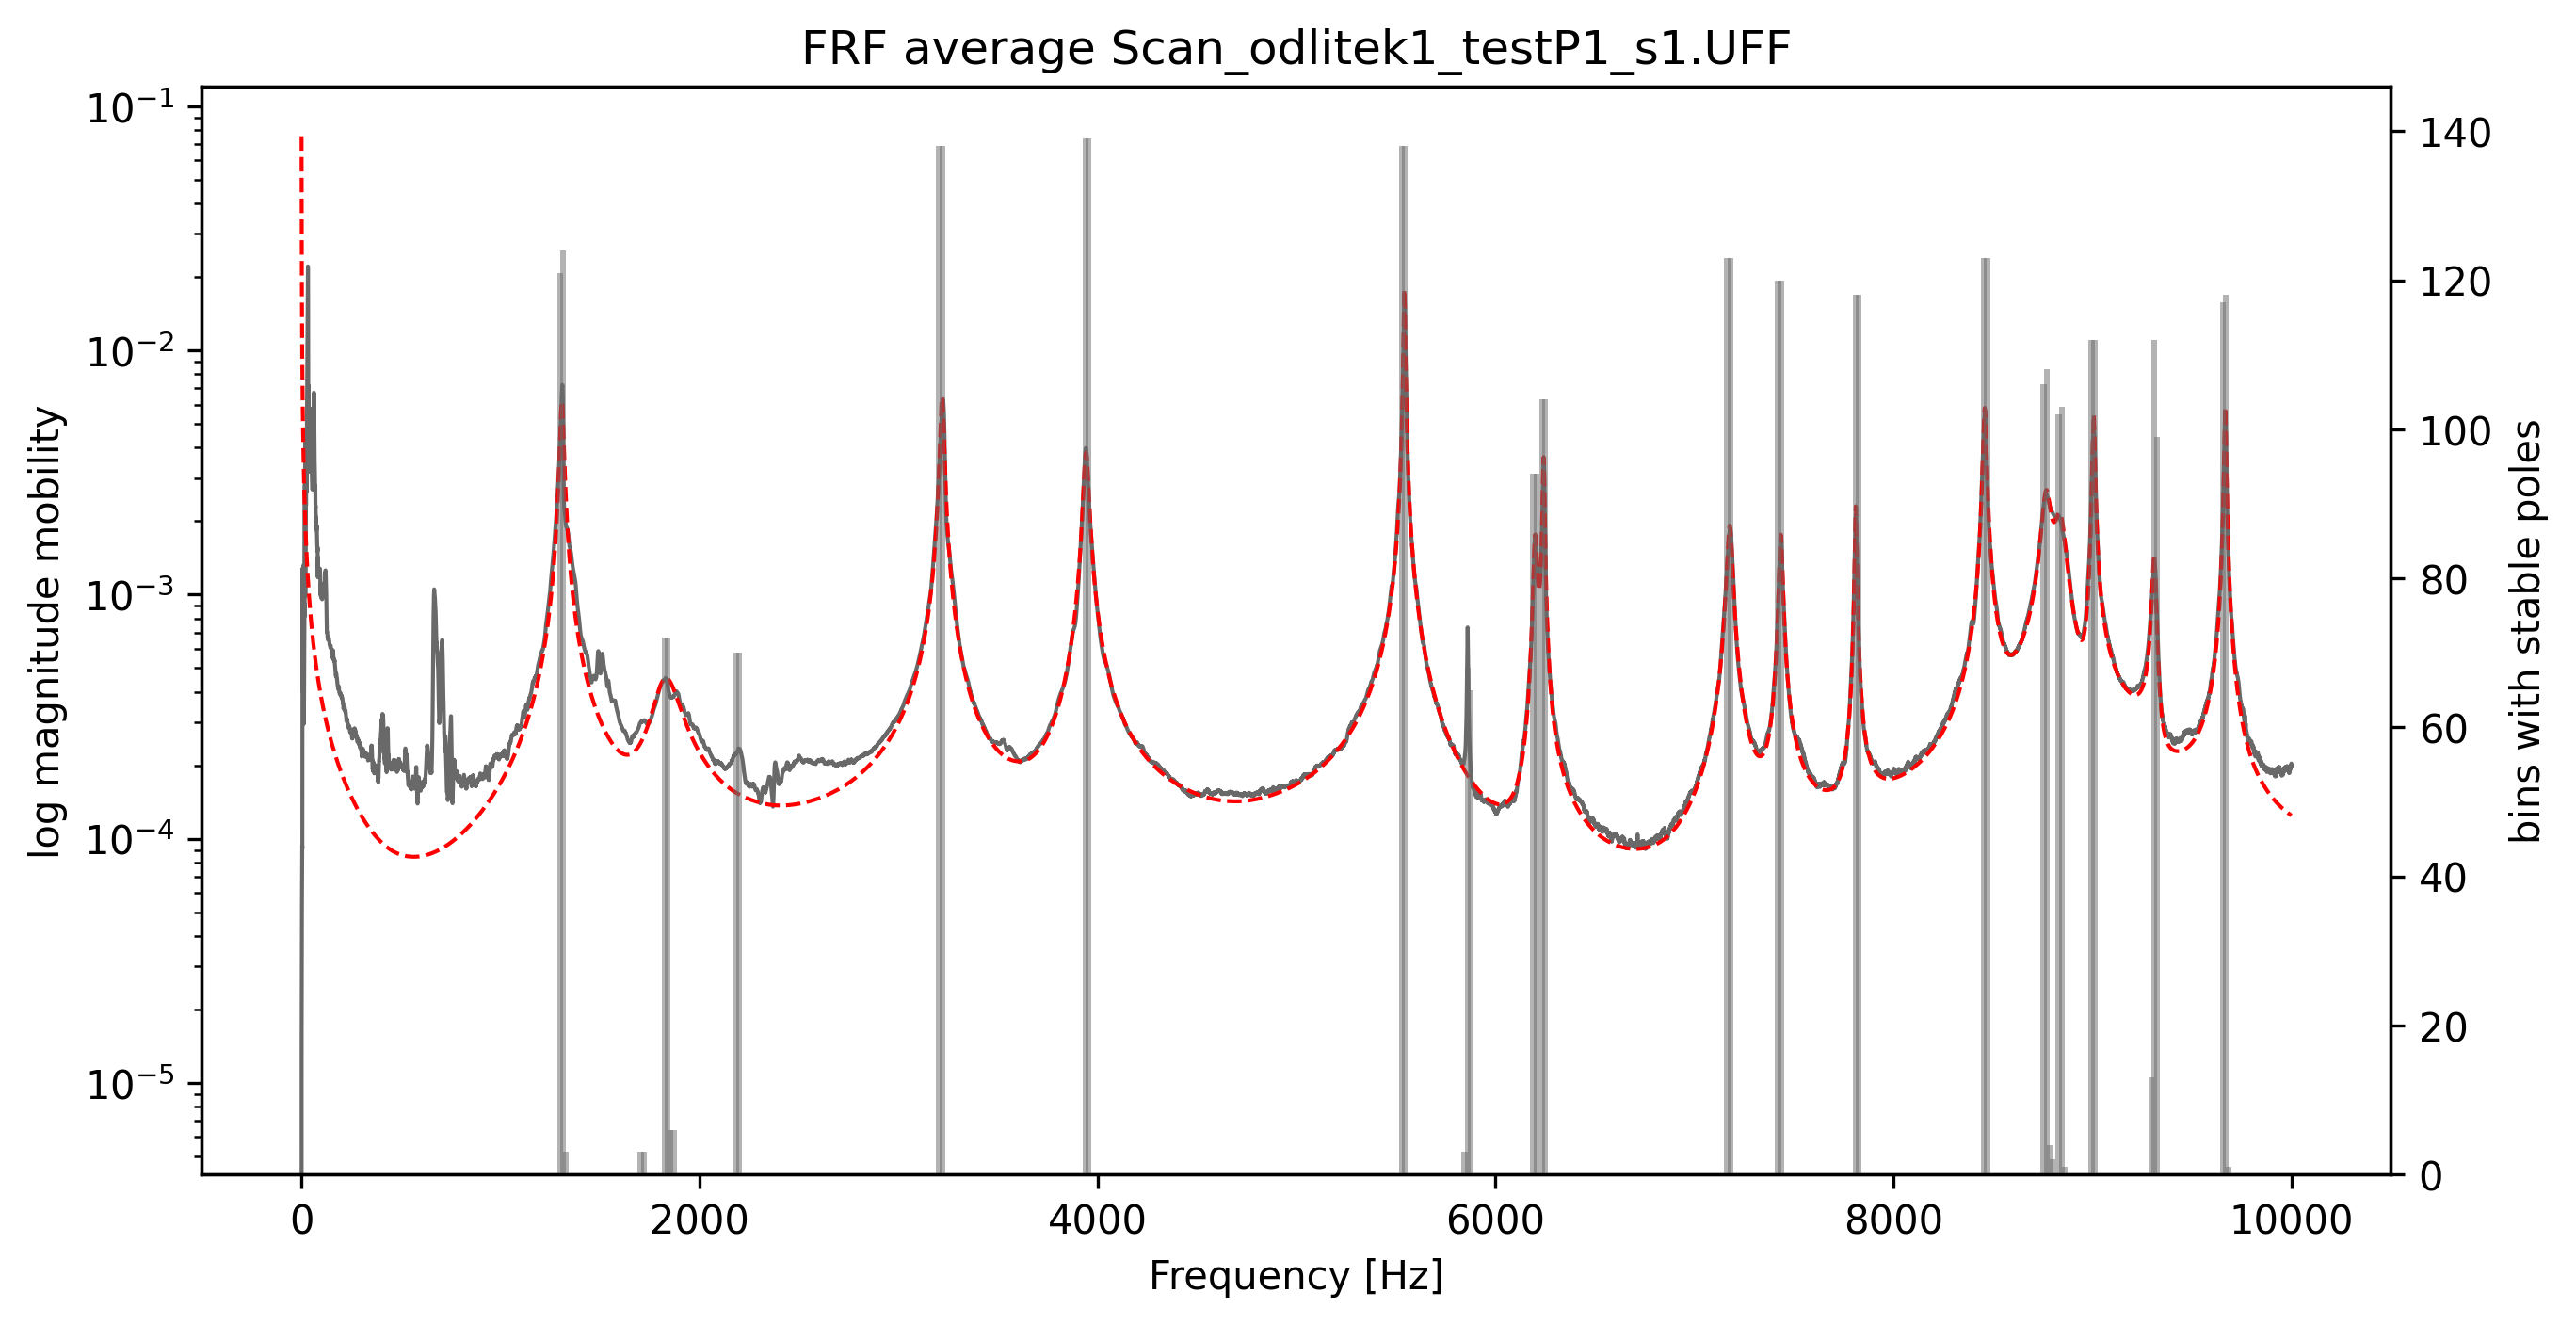

In [4]:
# Part 1, measurement 1
p11 = proc('Scan_odlitek1_testP1_s1.UFF')

100%|█████████████████████████████████████████████████████████████| 150/150 [00:01<00:00, 80.03it/s]


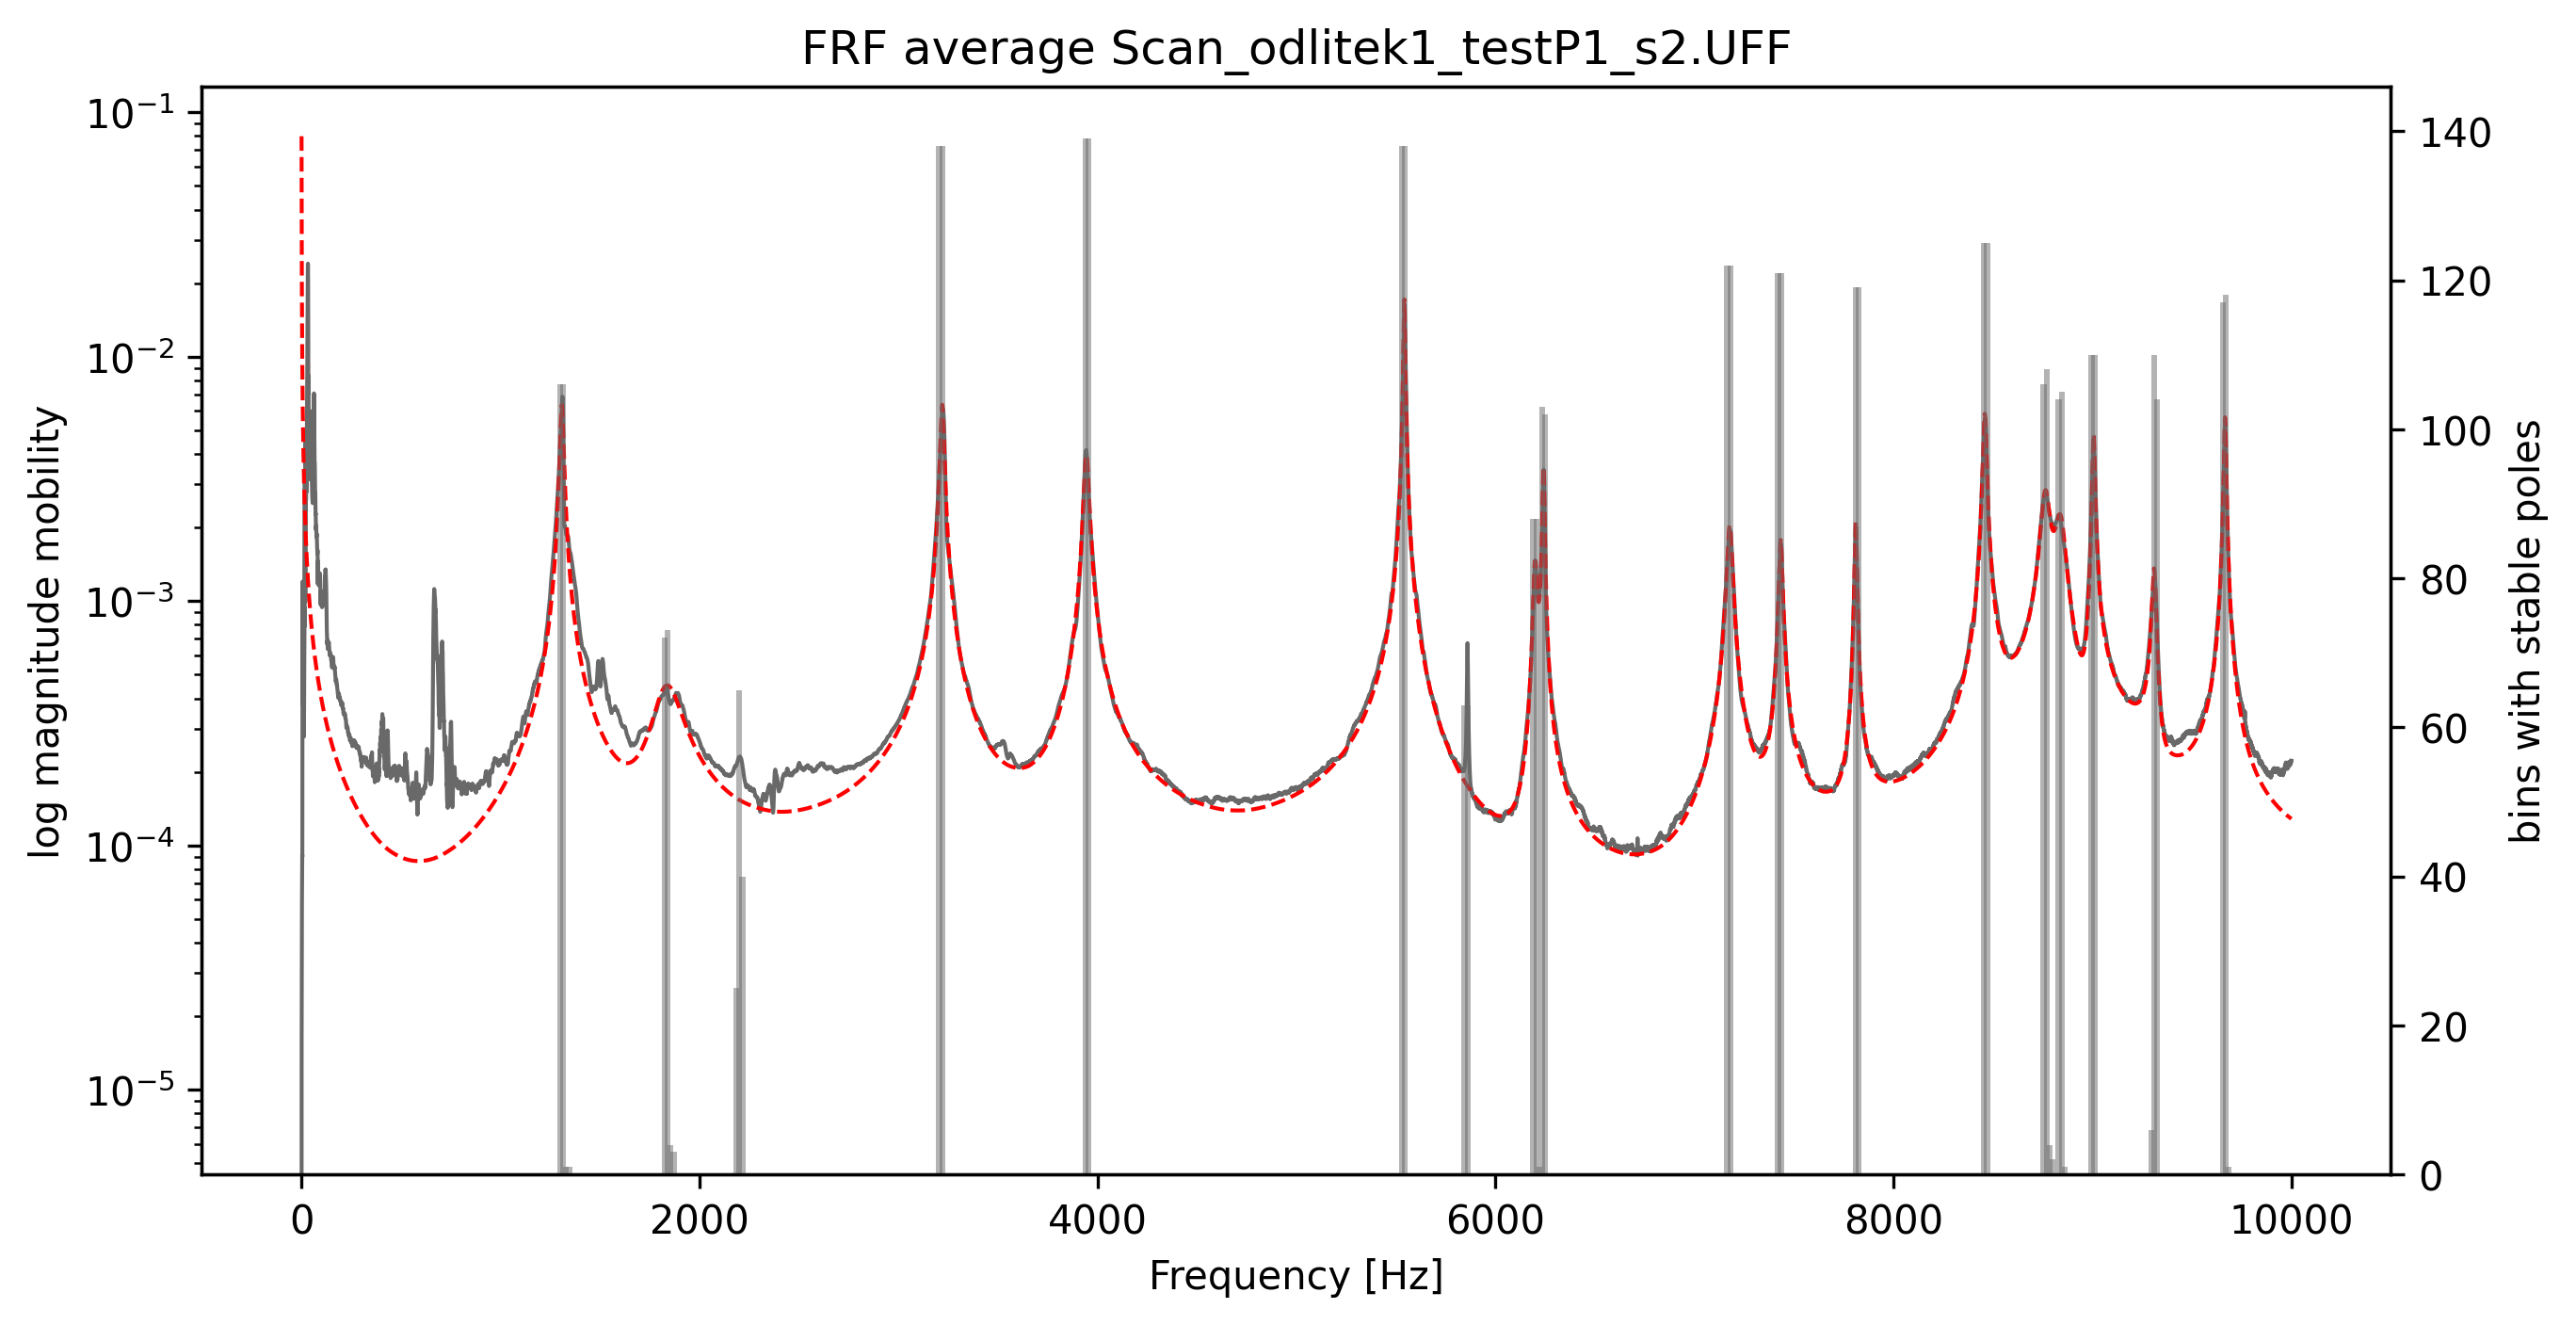

In [5]:
p12 = proc('Scan_odlitek1_testP1_s2.UFF')

100%|█████████████████████████████████████████████████████████████| 150/150 [00:01<00:00, 76.26it/s]


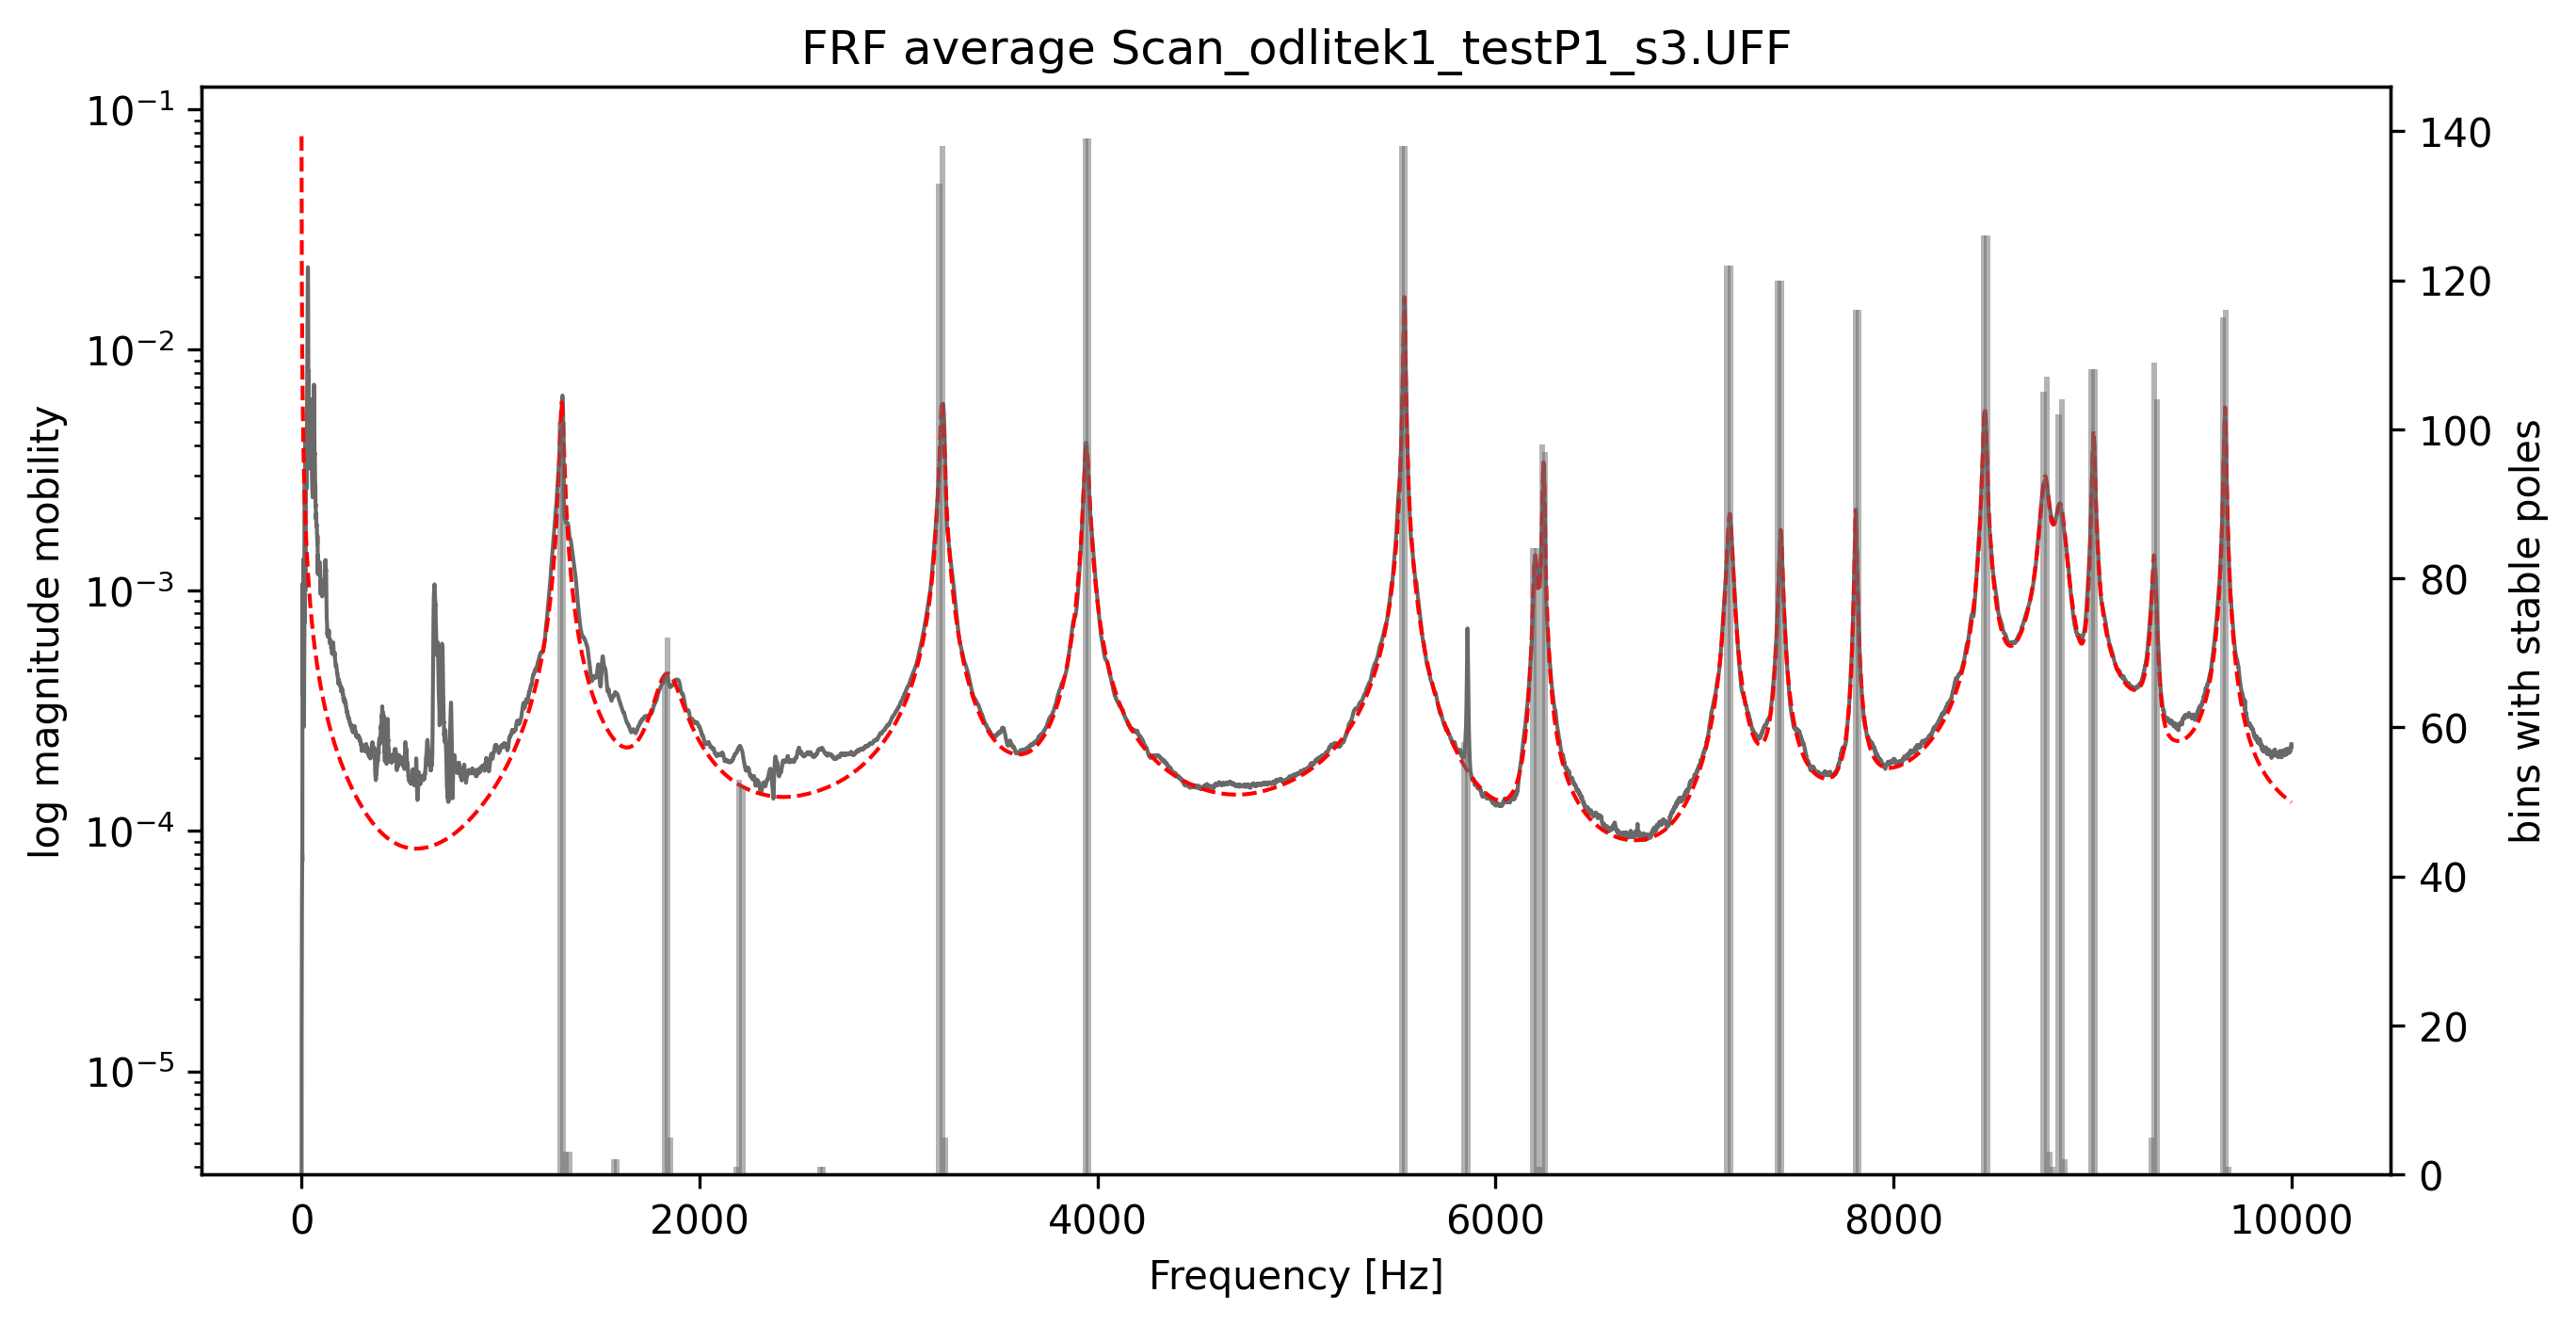

In [6]:
p13 = proc('Scan_odlitek1_testP1_s3.UFF')

100%|█████████████████████████████████████████████████████████████| 150/150 [00:01<00:00, 81.13it/s]


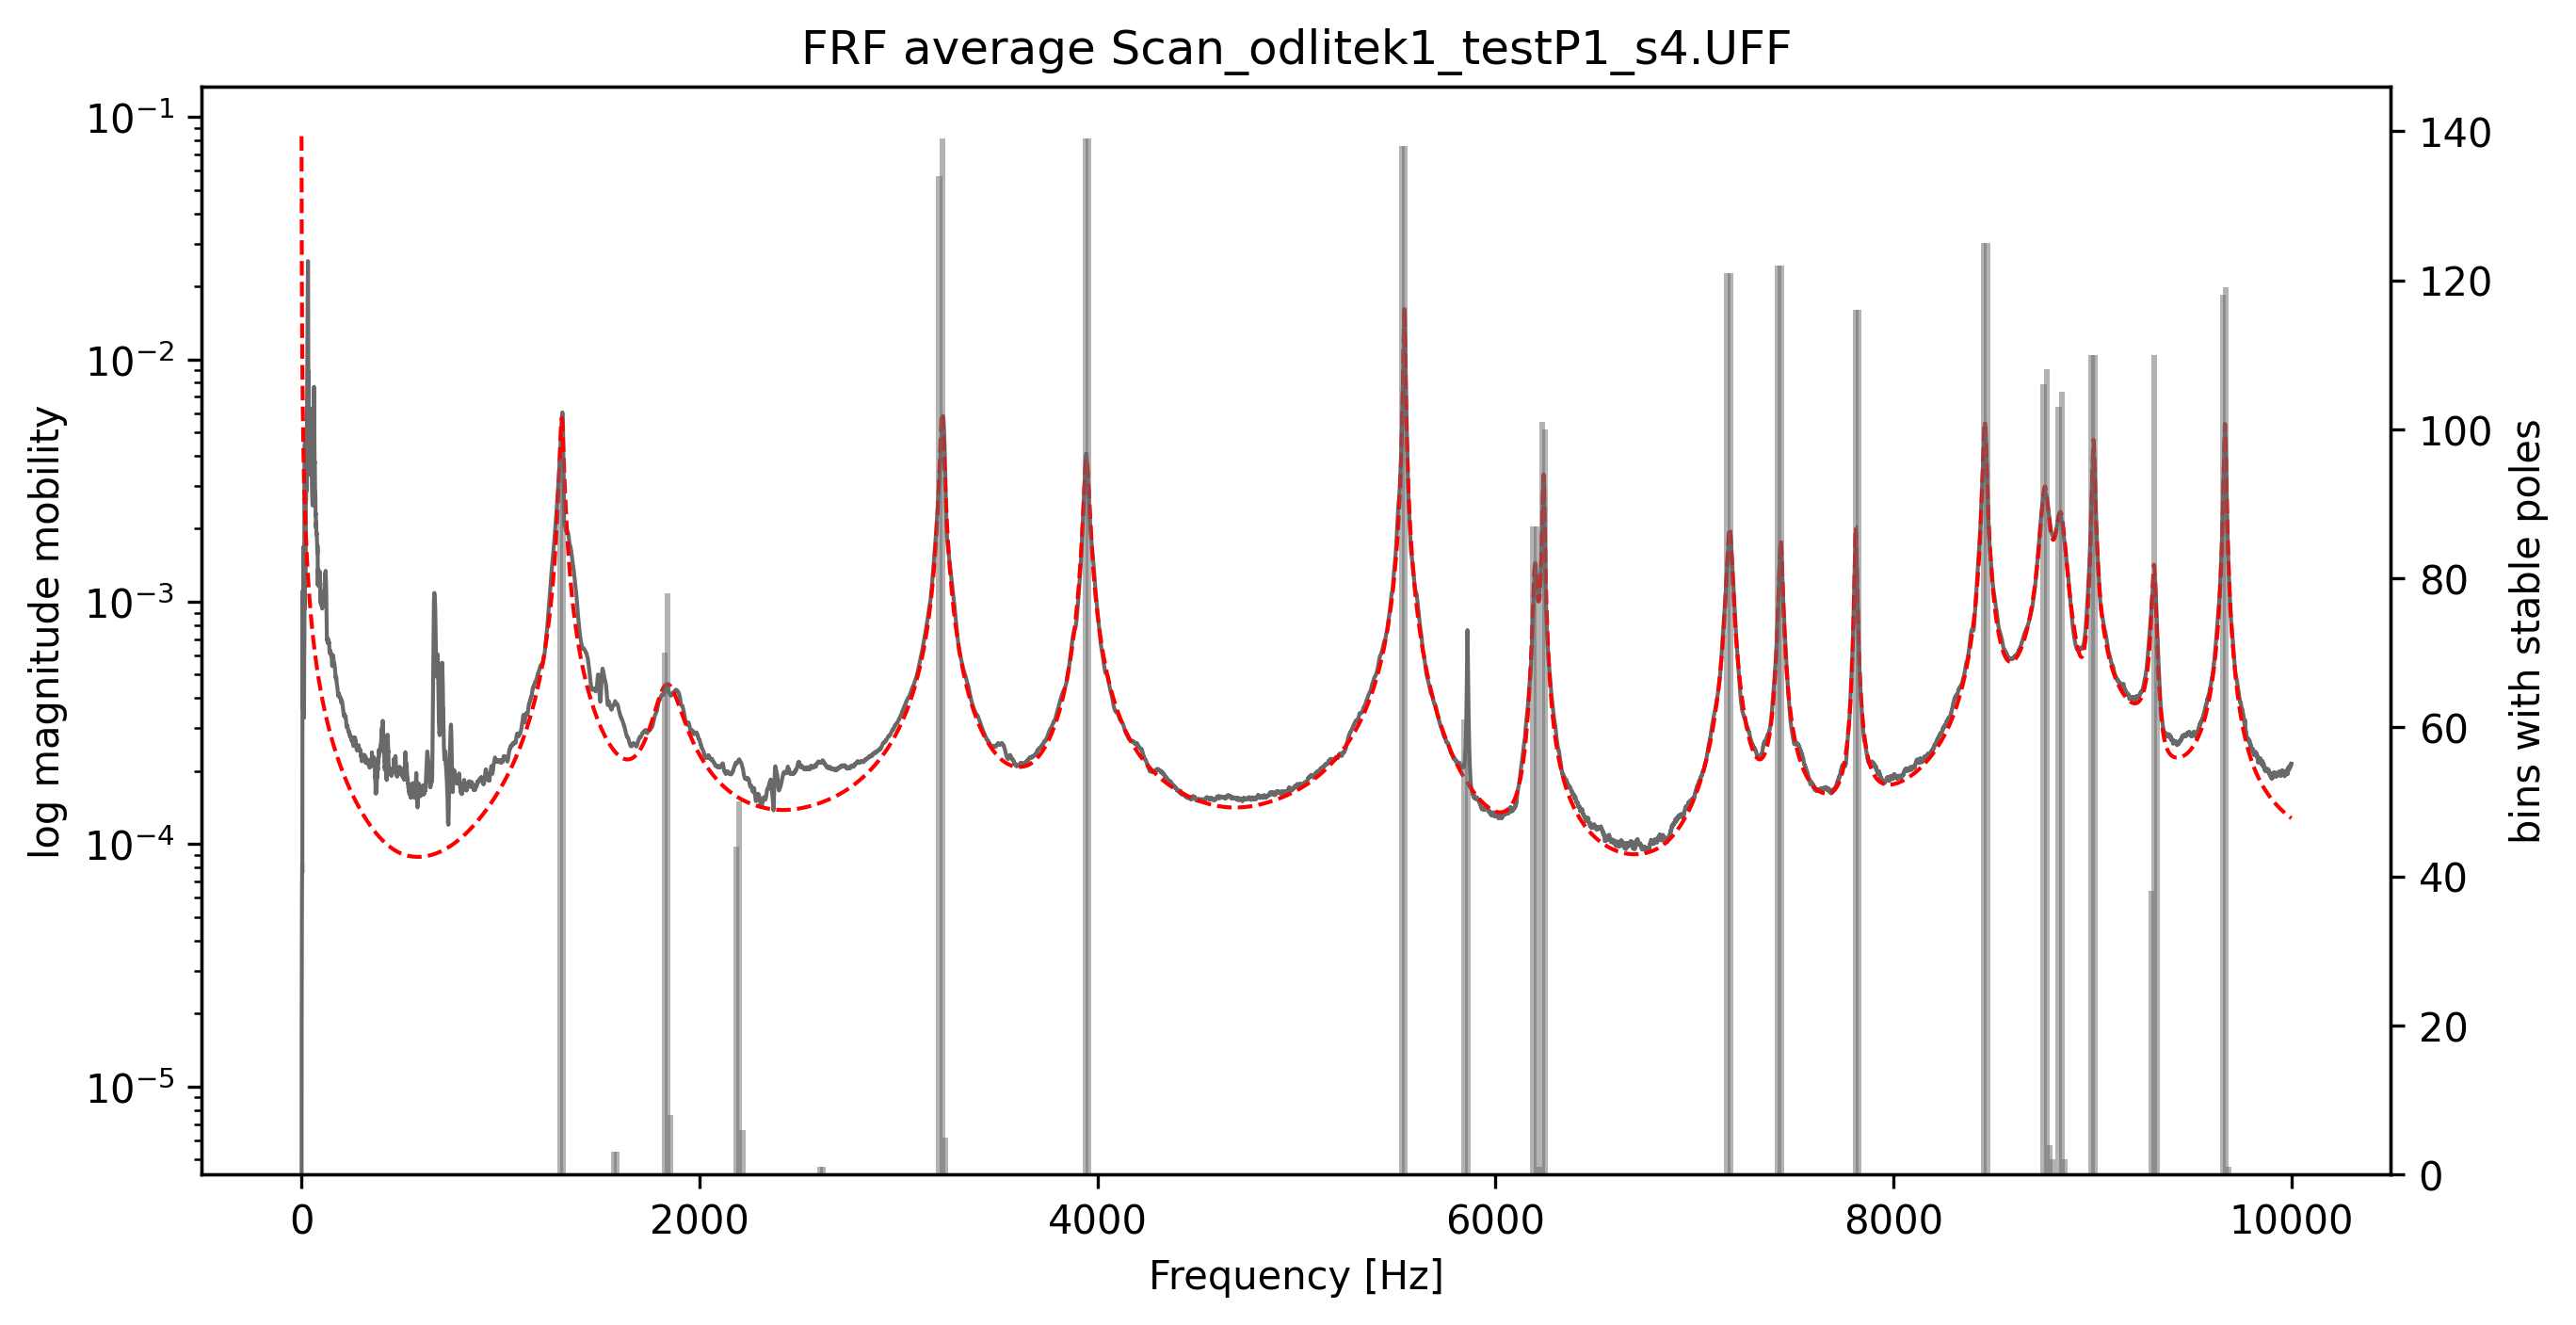

In [7]:
p14 = proc('Scan_odlitek1_testP1_s4.UFF')

In [8]:
p21 = proc('Scan_odlitek2_testP1_s1.UFF')

 72%|███████████████████████████████████████████▉                 | 108/150 [00:03<00:01, 32.69it/s]


KeyboardInterrupt: 

In [ ]:
p22 = proc('Scan_odlitek2_testP1_s2.UFF')

In [ ]:
p23 = proc('Scan_odlitek2_testP1_s3.UFF')

In [ ]:
p24 = proc('Scan_odlitek2_testP1_s4.UFF')

In [ ]:
p31 = proc('Scan_odlitek3_testP1_r1.UFF')

In [ ]:
p32 = proc('Scan_odlitek3_testP1_r2.UFF')

In [ ]:
p33 = proc('Scan_odlitek3_testP1_r3.UFF')

In [ ]:
p34 = proc('Scan_odlitek3_testP1_r4.UFF')

In [ ]:
p41 = proc('Scan_odlitek4_testP1_s1.UFF')

In [ ]:
p42 = proc('Scan_odlitek4_testP1_s2.UFF')

In [ ]:
p43 = proc('Scan_odlitek4_testP1_s3.UFF')

In [ ]:
p44 = proc('Scan_odlitek4_testP1_s4.UFF')

In [ ]:
p51 = proc('Scan_odlitek5_testP1_s1.UFF')

In [ ]:
p52 = proc('Scan_odlitek5_testP1_s2.UFF')

In [ ]:
p53 = proc('Scan_odlitek5_testP1_s3.UFF')

In [ ]:
p54 = proc('Scan_odlitek5_testP1_s4.UFF')

## Computing MAC criteria
Below, MAC criteria comparing all measurements with first measurement of part 1 (choosen as reference) are computed. It is clear that modal shapes are similar among all parts.

In [ ]:
MAC11 = tl.prettyMAC(p11, p11)

In [ ]:
MAC12 = tl.prettyMAC(p11, p12)

In [ ]:
MAC13 = tl.prettyMAC(p11, p13)

In [ ]:
MAC14 = tl.prettyMAC(p11, p14)

In [ ]:
MAC21 = tl.prettyMAC(p11, p21)

In [ ]:
MAC22 = tl.prettyMAC(p11, p22)

In [ ]:
MAC23 = tl.prettyMAC(p11, p23)

In [ ]:
MAC24 = tl.prettyMAC(p11, p24)

In [ ]:
MAC31 = tl.prettyMAC(p11, p31)

In [ ]:
MAC32 = tl.prettyMAC(p11, p32)

In [ ]:
MAC33 = tl.prettyMAC(p11, p33)

In [ ]:
MAC34 = tl.prettyMAC(p11, p34)

In [ ]:
MAC41 = tl.prettyMAC(p11, p41)

In [ ]:
MAC42 = tl.prettyMAC(p11, p42)

In [ ]:
MAC43 = tl.prettyMAC(p11, p43)

In [ ]:
MAC51 = tl.prettyMAC(p11, p51)

In [ ]:
MAC52 = tl.prettyMAC(p11, p52)

In [ ]:
MAC53 = tl.prettyMAC(p11, p53)

In [ ]:
MAC54 = tl.prettyMAC(p11, p54)